# Feature Matching applie to Cereal image

### Feature matching extract defining key features from an input image (using ideas from corner, edge, and contour detection)

**Import library's**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Load Cereal Box image**

In [2]:
reeses = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/reeses_puffs.png', 0)

**Create function to display image**

In [3]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

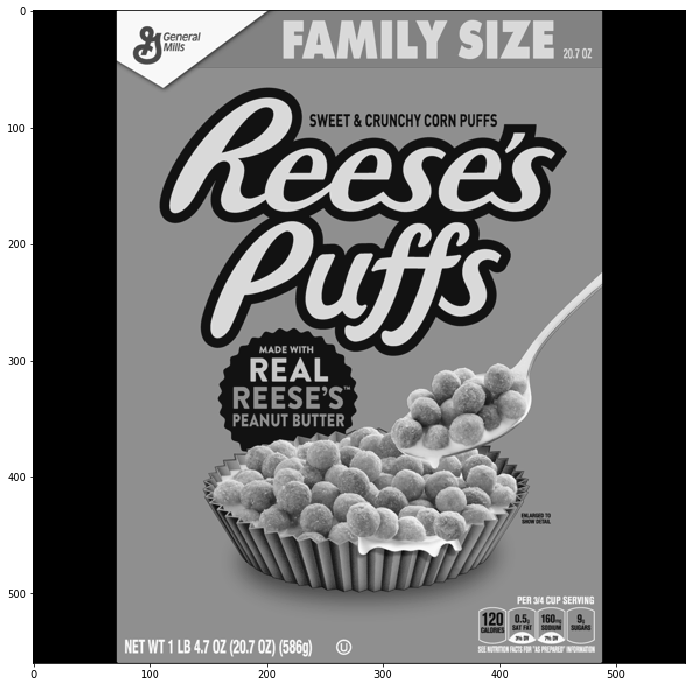

In [4]:
display(reeses)

**Load the target image**

In [5]:
cereals = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/many_cereals.jpg', 0)


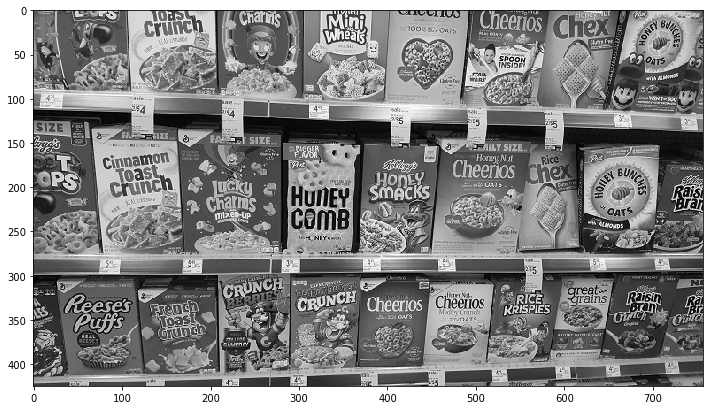

In [6]:
display(cereals)

## Using Brute-Force Matchin with ORB Descriptors

In [7]:
orb = cv2.ORB_create()

In [8]:
keypoints1, descriptors1 = orb.detectAndCompute(reeses, None)
keypoints2, descriptors2 = orb.detectAndCompute(cereals, None)

In [9]:
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
matches = brute_force.match(descriptors1, descriptors2)

In [12]:
single_match = matches[0]

In [15]:
single_match.distance

72.0

In [16]:
len(matches)

136

In [14]:
# use lambda expressions

matches = sorted(matches, key=lambda x:x.distance)

In [17]:
reeses_matches = cv2.drawMatches(reeses, keypoints1, cereals, keypoints2, matches[:25], None, flags=2)

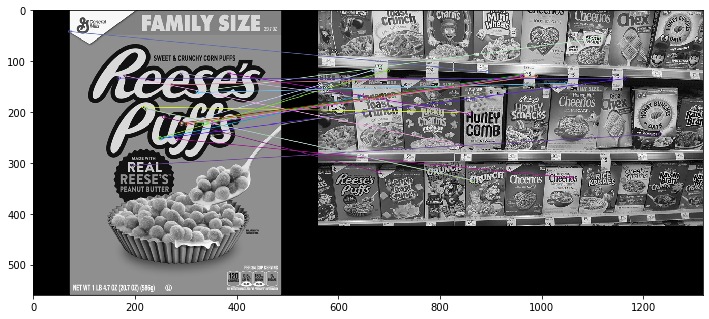

In [18]:
display(reeses_matches)